# Chien-Chat : CNN

1. télécharger les données sur le site [Kaggle](https://www.kaggle.com/c/dogs-vs-cats/data)
2. le fichier à récupérer est « train.zip » qui contient 25 000 photos couleurs de différentes tailles : 12 500 de chats (cat.1234.jpg) et 12 500 de chiens (dog.1234.jpg)
3. créer une structure de données permettant de placer les images
4. déplacer les photos :

1. déplacer 10000 photos de chats dans donnees/train/cats
2. déplacer 10000 photos de chiens dans donnees/train/dogs
3. déplacer 2 500 photos de chats restantes dans donnees/test/cats
4. déplacer 2 500 photos de chiens restantes dans donnees/test/dogs

Note : vous pouvez commencer avec seulement 1000 photos par sous-répertoire pour des calculs plus rapides.

Redimensionnement des photos. Les photos vont toutes être redimensionnées à la même taille, par exemple 64 × 64. Ces tâches préliminaires seront effectuées pour nous par keras. De plus, comme les photos représentent une grande quantité de données, nous allons voir comment keras permet de ne mettre en mémoire qu’une petite quantité d’images à chaque étape de la descente de gradient.

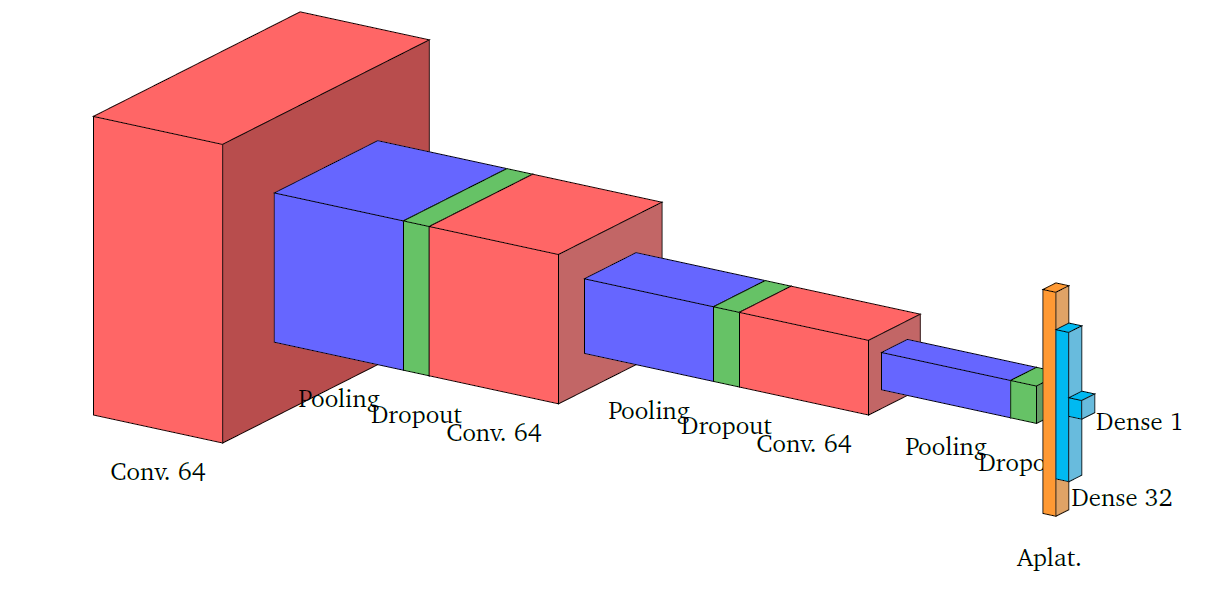

On alterne : couche de convolution, pooling et dropout. Il y a 206 685 poids à calculer

## 1. modules à charger

In [ ]:
# F. Chollet https://gist.github.com/fchollet/0830affa1f7f19fd47b06d4cf89ed44d
# Kaggle https://www.kaggle.com/c/dogs-vs-cats/data
# https://pythonistaplanet.com/image-classification-using-deep-learning/

from zipfile import ZipFile
import os

import numpy as np
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.models import load_model

## 2. Données

In [ ]:
# à télécharger sur https://www.kaggle.com/c/dogs-vs-cats/data
# re-créer une archive sur le bureau (avec seulement 25000 images - attention il y a un zip de trop) puis tranférer le fichier dog_cat.zip sur le drive
# cette manip semble être la plus rapide si on travaille sur colab

In [ ]:
# installe le drive -> plus rapide pour charger les photos dans colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# attention : bien attendre le chargement de l'archive (long) ... 224Mo
path_file_zip = os.path.join('drive','MyDrive','deep_learning','Colab_Notebooks','exo_7','dog_cat.zip')
with ZipFile(path_file_zip, 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [ ]:
train_directory = os.path.join('dog_cat', 'train')
test_directory = os.path.join('dog_cat', 'test')

image_width = 64
image_height = 64
nb_train_images = 20000
nb_test_images = 5000

# Transforme les images en données d'apprentissage : 
# (a) reformate les images en taille unique, 
# (b) créé une classification (à partir de chaque sous-répertoire) 0 pour les chats  et (1) pour les chiens 

train_datagen = ImageDataGenerator(rescale =1./255)
training_set = train_datagen.flow_from_directory(train_directory,
                                                target_size=(image_width,image_height),
                                                batch_size= 32,
                                                shuffle=True, seed=13,
                                                class_mode='binary')

# Idem pour les données de test 
test_datagen = ImageDataGenerator(rescale =1./255)
test_set = test_datagen.flow_from_directory(test_directory,
                                           target_size = (image_width,image_width),
                                           batch_size = 32,
                                           shuffle=True, seed=13,
                                           class_mode ='binary')

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


## 3. Afficher les images

In [ ]:
import matplotlib.pyplot as plt

def affiche_images():
    plt.axis('off')
    X, Y = training_set.next()  # a batch of 32 images
    # X = images, Y = categories chat/chien
    for i in range(9):
        image = X[i]
        plt.subplot(330 + 1 + i)
        if Y[i] == 0:
            animal = 'Chat'
        else:
            animal = 'Chien'
        plt.title(animal)
        plt.imshow(image, interpolation='nearest')
    plt.tight_layout()
    # plt.savefig('tfconv-chienchat-train.png')
    plt.show()

    return

# affiche_images()

## 4. Réseau

In [ ]:
# Partie B. Réseau 

modele = Sequential()

# Première couche de convolution : 32 neurones, convolution 3x3, activation relu
modele.add(Conv2D(64, kernel_size=3, padding='same', activation='relu', input_shape=(image_width,image_height,3)))

# Mise en commun (pooling)
modele.add(MaxPooling2D(pool_size=(2, 2)))

# Dropout
modele.add(Dropout(0.5))

# Deuxième couche de convolution : 32 neurones
modele.add(Conv2D(64, kernel_size=3, padding='same', activation='relu'))

# Mise en commun (pooling)
modele.add(MaxPooling2D(pool_size=(2, 2)))

# Dropout
modele.add(Dropout(0.5))

# Troisième couche de convolution : 32 neurones
modele.add(Conv2D(64, kernel_size=3, padding='same', activation='relu'))

# Mise en commun (pooling)
modele.add(MaxPooling2D(pool_size=(2, 2)))

# Dropout
modele.add(Dropout(0.5))

# Aplatissage 
modele.add(Flatten())

# Couche dense : 32 neurones
modele.add(Dense(32, activation='relu'))

# Couche de sortie : 1 neurone
modele.add(Dense(1, activation='sigmoid'))

# Méthode de gradient
modele.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Affiche un résumé
print(modele.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 64)        0

## 5. Entrainement du modèle

In [ ]:
history = modele.fit_generator(training_set,
                        steps_per_epoch = nb_train_images // 32,
                        epochs = 10)

Epoch 1/10


<ipython-input-8-1eaf290ac9fc>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = modele.fit_generator(training_set,


625/625 [==============================] - 72s 98ms/step - loss: 0.6730 - accuracy: 0.5669
Epoch 2/10
625/625 [==============================] - 63s 100ms/step - loss: 0.5827 - accuracy: 0.6892
Epoch 3/10
625/625 [==============================] - 60s 96ms/step - loss: 0.5465 - accuracy: 0.7215
Epoch 4/10
625/625 [==============================] - 62s 99ms/step - loss: 0.5175 - accuracy: 0.7401
Epoch 5/10
625/625 [==============================] - 61s 98ms/step - loss: 0.5028 - accuracy: 0.7524
Epoch 6/10
625/625 [==============================] - 61s 98ms/step - loss: 0.4827 - accuracy: 0.7624
Epoch 7/10
625/625 [==============================] - 62s 99ms/step - loss: 0.4657 - accuracy: 0.7795
Epoch 8/10
625/625 [==============================] - 62s 98ms/step - loss: 0.4479 - accuracy: 0.7891
Epoch 9/10
625/625 [==============================] - 59s 95ms/step - loss: 0.4393 - accuracy: 0.7901
Epoch 10/10
625/625 [==============================] - 59s 94ms/step - loss: 0.4319 - accura

## 5. Résultats

<ipython-input-9-f6b9ae89415b>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  score = modele.evaluate_generator(test_set, verbose=0)


Test erreur (loss) : 0.4416295289993286
Test précision (accuracy) : 0.7932000160217285


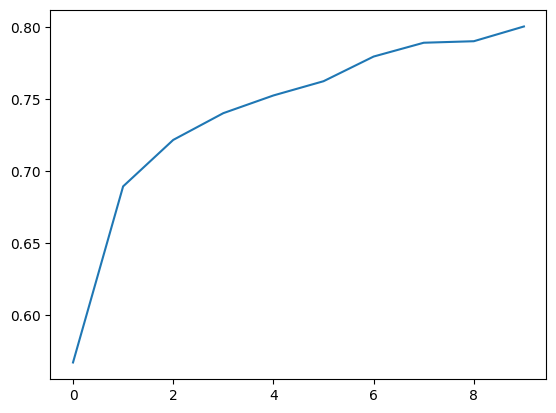

In [ ]:
score = modele.evaluate_generator(test_set, verbose=0)
print('Test erreur (loss) :', score[0])
print('Test précision (accuracy) :', score[1])

plt.plot(history.history['accuracy'])
plt.savefig('tfconv-chienchat-acc.png')
plt.show()


# 64x64 pixels

# c16-c32-c32-d32       79937 poids, 10 époques : 77%/78%
#                                    15 époques : 79%/80%
#                                    20 époques : 80%/80%
#                                    25 époques : 81%/80%      

# c64-c64-c64-d32       206 785 poids,  5 époques : 75%/78%
#                                      10 époques : 80%/81%  temps 11 min 30 s
#                                      15 époques : 82%/83%  
#                                      20 époques : 83.7%/83.6%  
#                                      25 époques : 84.7%/83.6%  
#                                      30 époques : 85.9%/84.3%  
#                                      35 époques : 86.9%/85.4% 
#                                      40 époques : 87.2%/85.8%  

## 6. Visualisation

Found 5000 images belonging to 2 classes.
1/1 [==============================] - 0s 107ms/step


<ipython-input-10-223c3ad28525>:14: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(330 + 1 + i)


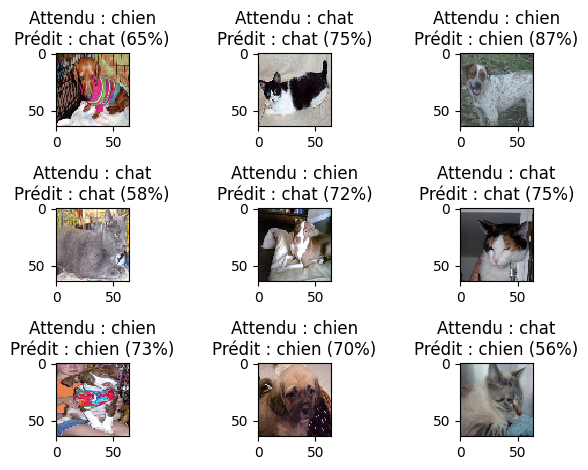

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 64)        0

In [ ]:
test_set = test_datagen.flow_from_directory(test_directory,
                                           target_size = (image_width,image_width),
                                           batch_size = 32,
                                           shuffle=True, seed=14,
                                           class_mode ='binary')

def affiche_images_test():
    plt.axis('off')
    X, Y = test_set.next()  # a test batch 
    # X = images, Y = categories chat/chien
    Y_predict = modele.predict(X)    
    for i in range(9):
        image = X[i]
        plt.subplot(330 + 1 + i)
        if Y[i] == 0:
            animal = 'Attendu : chat\n'
        else:
            animal = 'Attendu : chien\n'
        perc_chien = int(round(100*np.max(Y_predict[i])))
        perc_chat = 100 - perc_chien
        if Y_predict[i] <= 0.5:
            animal += 'Prédit : chat (%d%%)' % perc_chat
        else:
            animal += 'Prédit : chien (%d%%)' % perc_chien
        plt.title(animal)
        plt.imshow(image, interpolation='nearest')
    plt.tight_layout()
    plt.savefig('tfconv-chienchat-test.png')
    plt.show()

    return

affiche_images_test()
print(modele.summary())

## 6. Sauvegarde du modèle

In [ ]:
# Sauvegarde
path_save_model = os.path.join('drive','MyDrive','deep_learning','Colab_Notebooks','exo_7','models','weights_chien_chat_64_10epoch.h5')
modele.save_weights(filepath=path_save_model)

## 7. Chargement d'un modèle

In [ ]:
# Reprendre les poids déjà calculés
path_load_model = os.path.join(path_save_model, 'model', 'weights_chien_chat.h5')
modele_loaded = modele.load_weights(path_load_model)